<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Übung 3.2: Pandas</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>Programmierübung 2</b></font></div>
        </td>
    </tr>
</table>


# Loading, displaying and saving data
## Aim of this unit
Learn how to work with typical data formats in the field of medical, health and sports technology. Typical data formats are e.g. .csv and .txt files. In order to work with and process the data in the following exercises, the following skills must first be learned:
1. loading data + different data formats 
     - Numpy arrays
     - Pandas dataframes
     - Lists
2. Working with pandas
     -  Structure of dataframes
     -  Storing and Loading CSV-Files
     -  Advanced pandas
     -  Group by
     -  Operations on columns
     -  Creating new columns
     -  Simple analysis
3. Graphing data
     - Matplotlib
4. Tasks:
      1. Pandas
      2. Matplotlib
      3. Pandas Visualization


<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>2. Working with Pandas</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>Programmierübung 2</b></font></div>
        </td>
    </tr>
</table>

# Working with pandas
  -  Structure of DataFrames
  -  Storing and Loading CSV-Files
  -  Advanced pandas
  -  Group by
  -  Operations on columns
  -  Creating new columns
  -  Simple analysis

## Stucture of dataframes

Pandas is an open-source library that is built on top of NumPy library. It is a Python package that offers various data structures and operations for manipulating numerical data and time series. It is mainly popular for importing and analyzing data much easier. [source](https://www.geeksforgeeks.org/pandas-tutorial/?ref=lbp)

Pandas generally provide two data structures for manipulating data, They are: 

- Series
- DataFrame

### Series

A Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called indexes. Pandas Series is nothing but a column in an excel sheet. Labels need not be unique but must be a hashable type. The object supports both integer and label-based indexing and provides a host of methods for performing operations involving the index.

In [1]:
# import libraries if neccesary 
import pandas as pd
import numpy as np

# Creating empty series
ser = pd.Series()
   
print(ser)
 
# simple array
data = np.array(['A', 'C', 'G', 'T', 'A'])

# Creating a series from an array   
ser = pd.Series(data)
print(ser)

Series([], dtype: object)
0    A
1    C
2    G
3    T
4    A
dtype: object


You see two columns of the series. Left, the index is counting up starting at 0. On the right the values are stored.

While the values are not all unique:

In [2]:
ser.unique()

array(['A', 'C', 'G', 'T'], dtype=object)

Each value in the index of the series is unique, as is a number in the range from 0 to 5.

In [3]:
ser.index.unique()

RangeIndex(start=0, stop=5, step=1)

### DataFrame
Pandas DataFrame is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns.

![](https://media.geeksforgeeks.org/wp-content/uploads/20200225170602/pandas-dataframe.png)

Data frames can be created from dictionaries. The keys are the variable names, while the column data is passed as list in the dictionaries' value.

A dataframe is basically a collection of series (here, one for age and one for name), where a single observation shares the same index.

In [4]:
# Python code demonstrate creating 
# DataFrame from dict ndarray / lists 
# By default addresses.
 
import pandas as pd
 
# initialise data of lists.
data = {'Name':['Tom', 'nick', 'krish', 'jack'],
        'Age':[20, 21, 19, 18]}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

    Name  Age
0    Tom   20
1   nick   21
2  krish   19
3   jack   18


A convinient way to print data frame ist the ```head()``` fuction. By default it prints the first five rows of a data frame, so You can get a first impression of the columns and what is in them. Similarly, there is the ```tail()```function.

In [5]:
df.head()

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


✍️ **Task** 

Try out the head and tail function with different parameters.

In [6]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

df.tail(2)

,Name,Age
2,krish,19
3,jack,18


✍️ **Task**

Store the example data from the following lecture results in a DataFrame.

```
data = {"gender": ["Male", "Female", "Female", "Female", "Male"],
        "education" : ["M.Sc.", "B.Sc.", "B.Sc.", "PhD", "none"],
        "body_temperature_celsius" : [37.85, 39.85, 38.85, 36.85, 37.85],
        "points_in_exam" : [0, 100, 80, 80, 40]}
```

See in the example above, how You can store the data in a dictionary first and convert the dictionary to a dataframe:

In [7]:
data = { "Gender" : ["Male", "Female", "Female", "Female", "Male"],
"Education" : ["M.Sc.", "B.Sc.", "B.Sc.", "PhD", "none"],
"Body_temperature_celsius" : [37.85, 39.85, 38.85, 36.85, 37.85], 
"points_in_exam" : [0, 100, 80, 80, 40]}

# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

   Gender Education  Body_temperature_celsius  points_in_exam
0    Male     M.Sc.                     37.85               0
1  Female     B.Sc.                     39.85             100
2  Female     B.Sc.                     38.85              80
3  Female       PhD                     36.85              80
4    Male      none                     37.85              40


#### Storing and Loading CSV-Files

You will often get tabular data as csv-files. You will also want to store Your tables, after You edited them in Python.

You can use the following pandas-functions to  do this:

- `<data_frame_name>.to_csv("<file_path_and_name.csv>")>` stores an existing dataframe with the name `data_frame_name` in a file. You can also pass a lot of additional [parameters](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html), e.g, the kind of separator You want to use.  

- `<data_frame_name> = pd.read_csv("<file_path_and_name.csv>")` creates a new dataframe by loading a file from Your file system. I also has a lot of optional [parameters](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), that allows You to open different types of CSV-files.

In [8]:
# Loading pandas
import pandas as pd

# Creating a dictionary with the data
data = { "Gender" : ["Male", "Female", "Female", "Female", "Male"],
"Education" : ["M.Sc.", "B.Sc.", "B.Sc.", "PhD", "none"],
"Body_temperature_celsius" : [37.85, 39.85, 38.85, 36.85, 37.85], 
"points_in_exam" : [0, 100, 80, 80, 40]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

In [9]:
# Stores the a dataframe as a file with a ";"" as separator
df.to_csv("Data/data.csv", sep =";")

In [10]:
# Tries to create a Dataframe with the default separator (",")
df1 = pd.read_csv("Data/data.csv", sep = ",")
df1

,;Gender;Education;Body_temperature_celsius;points_in_exam
0,0;Male;M.Sc.;37.85;0
1,1;Female;B.Sc.;39.85;100
2,2;Female;B.Sc.;38.85;80
3,3;Female;PhD;36.85;80
4,4;Male;none;37.85;40


✍️ **Task**

As You can see, the example before has a faulty result: Only one column has be created that holds all the information. The reason is, that when reading the file, Panda by default looked for a `,` to end the columns. As there was none in the CSV-File, everything was put in the first column.


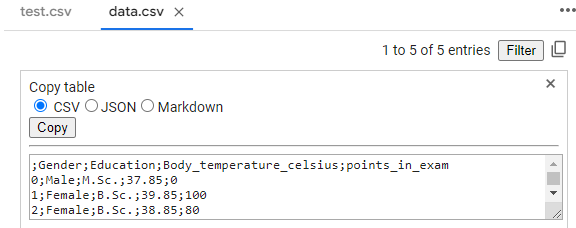




To fix this, You could replace all `,` by `;` in the CSV-file. The more convenient way, however, is the call the `pd.read_csv()` function with optional [parameters](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
Select an optional parameters, to load the data correctly. 

- *Hint:*

Look either at the link on how to change the default seperator or look in the code above how we created the CSV in the first place. The notation for the parameter in `.read_csv()` and `.to_csv()` are identical.

```
df2 = pd.read_csv("data.csv", <optional_paramters>)
df2
```

In [11]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

df1 = pd.read_csv("Data/data.csv", sep =";")
df1

,Unnamed: 0,Gender,Education,Body_temperature_celsius,points_in_exam
0,0,Male,M.Sc.,37.85,0
1,1,Female,B.Sc.,39.85,100
2,2,Female,B.Sc.,38.85,80
3,3,Female,PhD,36.85,80
4,4,Male,none,37.85,40


# 1.2 Advanced pandas

In the following, we use pandas to perform simple data analysis task, as we would do with MS Excel.


✍️ **Task**

Test the following functions on the DataFrame:
  - ```mode()```
  - ```median()```
  - ```mean()```
  - ```describe()```

In [12]:
import pandas as pd
data = { "Gender" : ["Male", "Female", "Female", "Female", "Male"],
"Education" : ["M.Sc.", "B.Sc.", "B.Sc.", "PhD", "none"],
"Body_temperature_celsius" : [37.85, 39.85, 38.85, 36.85, 37.85], 
"points_in_exam" : [0, 100, 80, 80, 40]}

# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

   Gender Education  Body_temperature_celsius  points_in_exam
0    Male     M.Sc.                     37.85               0
1  Female     B.Sc.                     39.85             100
2  Female     B.Sc.                     38.85              80
3  Female       PhD                     36.85              80
4    Male      none                     37.85              40


In [13]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

df.mean(numeric_only=True)

Body_temperature_celsius    38.25
points_in_exam              60.00
dtype: float64

In [15]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

df.median(numeric_only=True)

Body_temperature_celsius    37.85
points_in_exam              80.00
dtype: float64

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

df.mode()


,Gender,Education,Body_temperature_celsius,points_in_exam
0,Female,B.Sc.,37.85,80


In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

df.describe()

,Body_temperature_celsius,points_in_exam
count,5.000000,5.0
mean,38.250000,60.0
std,1.140175,40.0
min,36.850000,0.0
25%,37.850000,40.0
50%,37.850000,80.0
75%,38.850000,80.0
max,39.850000,100.0


Note, that those functions also work for individual columns:

In [ ]:
df

,Gender,Education,Body_temperature_celsius,points_in_exam
0,Male,M.Sc.,37.85,0
1,Female,B.Sc.,39.85,100
2,Female,B.Sc.,38.85,80
3,Female,PhD,36.85,80
4,Male,none,37.85,40


## Indexing and Selecting Data

Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame. Indexing could mean selecting all the rows and some of the columns, some of the rows and all of the columns, or some of each of the rows and columns. 

Indexing a Dataframe using indexing operator ```[]```


### Selecting a single columns



In [ ]:
# retrieving columns by indexing operator
first = df["Education"]
 
print(first)

0    M.Sc.
1    B.Sc.
2    B.Sc.
3      PhD
4     none
Name: Education, dtype: object


### Index

The index is a special column like a key in a dictionary. Like a key, an index must be unique so that is can be used to identify a certain row.

If You do not define an index for a dataframe, pandas automatically creates an numerical index as the first column:

In [ ]:
data = { "Name" : ["A","B","C","D","E"], 
"Gender" : ["Male", "Female", "Female", "Female", "Male"],
"Education" : ["M.Sc.", "B.Sc.", "B.Sc.", "PhD", "none"],
"Body_temperature_celsius" : [37.85, 39.85, 38.85, 36.85, 37.85], 
"points_in_exam" : [0, 100, 80, 80, 40]}

# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)
print(df.index)

  Name  Gender Education  Body_temperature_celsius  points_in_exam
0    A    Male     M.Sc.                     37.85               0
1    B  Female     B.Sc.                     39.85             100
2    C  Female     B.Sc.                     38.85              80
3    D  Female       PhD                     36.85              80
4    E    Male      none                     37.85              40
RangeIndex(start=0, stop=5, step=1)


In [ ]:
df.loc[2]

Name                             C
Gender                      Female
Education                    B.Sc.
Body_temperature_celsius     38.85
points_in_exam                  80
Name: 2, dtype: object

Alternatively, You can decide for any coloumn to become the index:

In [ ]:
data = { "Name" : ["A","B","C","D","E"], 
"Gender" : ["Male", "Female", "Female", "Female", "Male"],
"Education" : ["M.Sc.", "B.Sc.", "B.Sc.", "PhD", "none"],
"Body_temperature_celsius" : [37.85, 39.85, 38.85, 36.85, 37.85], 
"points_in_exam" : [0, 100, 80, 80, 40],
"points_bonus" : [5, 10, 0, 5, 5]}


# Create DataFrame
df = pd.DataFrame(data)
df = df.set_index('Name')

# Print the output.
print(df)

      Gender Education  Body_temperature_celsius  points_in_exam  points_bonus
Name                                                                          
A       Male     M.Sc.                     37.85               0             5
B     Female     B.Sc.                     39.85             100            10
C     Female     B.Sc.                     38.85              80             0
D     Female       PhD                     36.85              80             5
E       Male      none                     37.85              40             5


### Selecting a single row

The ```.loc[ ]``` function selects data by the label of the rows and columns. The df.loc indexer selects data in a different way than just the indexing operator. It can select subsets of rows or columns. It can also simultaneously select subsets of rows and columns.


In [ ]:
df.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object', name='Name')

In [ ]:
# retrieving columns by indexing operator
first = df.loc["B"]
 
print(first)

Gender                      Female
Education                    B.Sc.
Body_temperature_celsius     39.85
points_in_exam                 100
points_bonus                    10
Name: B, dtype: object


In [ ]:
# retrieving columns by indexing operator
first = df.loc["B"]["Gender"]
 
print(first)


Female


✍️ **Task**

Select the body temperature of the person named "C"

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

temp = df.loc["C"]["Body_temperature_celsius"]
temp

38.85

Even after changing the index, You can still use the numerical position of the rows and columns to access tha data using the ```iloc[]``` function.

In [ ]:
df

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus
Name,,,,,
A,Male,M.Sc.,37.85,0,5
B,Female,B.Sc.,39.85,100,10
C,Female,B.Sc.,38.85,80,0
D,Female,PhD,36.85,80,5
E,Male,none,37.85,40,5


In [ ]:
temp = df.iloc[3][1]
temp

C:\Users\JLHUBER\AppData\Local\Temp\ipykernel_9352\2555595056.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = df.iloc[3][1]


'PhD'

### Iteration

You might want to iterate through the rows of the data frames  as You did with lists and dictionaries. You can do this by using the ```iterrows()``` function

In [ ]:
df

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus
Name,,,,,
A,Male,M.Sc.,37.85,0,5
B,Female,B.Sc.,39.85,100,10
C,Female,B.Sc.,38.85,80,0
D,Female,PhD,36.85,80,5
E,Male,none,37.85,40,5


In [ ]:
for index, observation in df.iterrows():
    
    print("The index is {}. ".format(index))
    print("The full observation is \n{}".format(observation))
    print("The body temperature is {}".format(observation["Body_temperature_celsius"]))
    print("\n")

The index is A. 
The full observation is 
Gender                       Male
Education                   M.Sc.
Body_temperature_celsius    37.85
points_in_exam                  0
points_bonus                    5
Name: A, dtype: object
The body temperature is 37.85


The index is B. 
The full observation is 
Gender                      Female
Education                    B.Sc.
Body_temperature_celsius     39.85
points_in_exam                 100
points_bonus                    10
Name: B, dtype: object
The body temperature is 39.85


The index is C. 
The full observation is 
Gender                      Female
Education                    B.Sc.
Body_temperature_celsius     38.85
points_in_exam                  80
points_bonus                     0
Name: C, dtype: object
The body temperature is 38.85


The index is D. 
The full observation is 
Gender                      Female
Education                      PhD
Body_temperature_celsius     36.85
points_in_exam                  80
points_

In [ ]:
df

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus
Name,,,,,
A,Male,M.Sc.,37.85,0,5
B,Female,B.Sc.,39.85,100,10
C,Female,B.Sc.,38.85,80,0
D,Female,PhD,36.85,80,5
E,Male,none,37.85,40,5


✍️ **Task**

Write a for loop, that prints "E is a Male and his/her body temperature is 37.85. This is X degree higher than the average body temperature."

To print multiple variables in a string You can build it like this:
`print("{0} is a {1} and his body temperature is {2:.2f}.".format(name, gender, temp-mean_temp))`

🤓 Bonus:
- make male and female lower case
- use the right pronoun 
- use lower/higher
- only use 2 decimals 

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

mean_temp = df["Body_temperature_celsius"].mean()

for index, observation in df.iterrows():

    name = index
    gender = observation["Gender"]
    temp = observation["Body_temperature_celsius"]

    if temp >mean_temp:
        higher_lower = "higher"
    else:
         higher_lower = "lower"       

    print("{0} is a {1} and his body temperature is {2:.2f} degree {3} than the average body temperature.".format(name, gender, temp-mean_temp, higher_lower))
    print("\n")

A is a Male and his body temperature is -0.40 degree lower than the average body temperature.


B is a Female and his body temperature is 1.60 degree higher than the average body temperature.


C is a Female and his body temperature is 0.60 degree higher than the average body temperature.


D is a Female and his body temperature is -1.40 degree lower than the average body temperature.


E is a Male and his body temperature is -0.40 degree lower than the average body temperature.




### Filtering and Where Clause

If You want to remove rows from a data frame based on a filter, You can use the ```where()``` function. 


In [ ]:
df

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus
Name,,,,,
A,Male,M.Sc.,37.85,0,5
B,Female,B.Sc.,39.85,100,10
C,Female,B.Sc.,38.85,80,0
D,Female,PhD,36.85,80,5
E,Male,none,37.85,40,5


Filters are comparisons between columns or values and colums, that return a series of Boolean values:

In [ ]:
df["Gender"]=="Female"

Name
A    False
B     True
C     True
D     True
E    False
Name: Gender, dtype: bool

You can use such filters in a where clause to remove rows in a data frame replacing them by ```NaN```

In [ ]:
# making boolean series for a team name
filter1 = df["Gender"]=="Female"
  
# making boolean series for age
filter2 = df["points_in_exam"]>60
  
# filtering data on basis of both filters
filtered_df = df.where(filter1 & filter2)
  
# display
filtered_df

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus
Name,,,,,
A,NaN,NaN,NaN,NaN,NaN
B,Female,B.Sc.,39.85,100.0,10.0
C,Female,B.Sc.,38.85,80.0,0.0
D,Female,PhD,36.85,80.0,5.0
E,NaN,NaN,NaN,NaN,NaN


In [ ]:
filtered_df.dropna()

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus
Name,,,,,
B,Female,B.Sc.,39.85,100.0,10.0
C,Female,B.Sc.,38.85,80.0,0.0
D,Female,PhD,36.85,80.0,5.0


You might come across a shorter notation with the same effect. Here the series reternd by the filter is used for indexing the data frame:

In [ ]:
df

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus
Name,,,,,
A,Male,M.Sc.,37.85,0,5
B,Female,B.Sc.,39.85,100,10
C,Female,B.Sc.,38.85,80,0
D,Female,PhD,36.85,80,5
E,Male,none,37.85,40,5


In [ ]:
df["Gender"]=="Female"


Name
A    False
B     True
C     True
D     True
E    False
Name: Gender, dtype: bool

In [ ]:
df[df["Gender"]=="Female"]
# ich möchte df
    #df
    # an der stelle wo
    # df["Gender"]=="Female"

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus
Name,,,,,
B,Female,B.Sc.,39.85,100,10
C,Female,B.Sc.,38.85,80,0
D,Female,PhD,36.85,80,5


In [ ]:
df["Gender"]

Name
A      Male
B    Female
C    Female
D    Female
E      Male
Name: Gender, dtype: object

## Group By

Groupby is a pretty simple concept. We can create a grouping of categories and apply a function to the categories. It’s a simple concept but it’s an extremely valuable technique that’s widely used in data science and when working with data bases.

- Splitting : It is a process in which we split data into group by applying some conditions on datasets.
- Applying : It is a process in which we apply a function to each group independently

In [ ]:
df

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus
Name,,,,,
A,Male,M.Sc.,37.85,0,5
B,Female,B.Sc.,39.85,100,10
C,Female,B.Sc.,38.85,80,0
D,Female,PhD,36.85,80,5
E,Male,none,37.85,40,5


In [ ]:
# Splitting the data
df.groupby('Gender')
print(df.groupby('Gender').groups)

{'Female': ['B', 'C', 'D'], 'Male': ['A', 'E']}


In [16]:
# Splitting and applying a fuction
df.groupby('Gender').mean(numeric_only=True)

,Body_temperature_celsius,points_in_exam
Gender,,
Female,38.516667,86.666667
Male,37.850000,20.000000


✍️ **Task**

Split the data by the highest education and return the minimum points in the exam in each group. Try to return a series with only the eduction and the points  

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

df.groupby('Education').min()

,Gender,Body_temperature_celsius,points_in_exam
Education,,,
B.Sc.,Female,38.85,80
M.Sc.,Male,37.85,0
PhD,Female,36.85,80
none,Male,37.85,40


In [ ]:
df.groupby('Education').min()['points_in_exam']

Education
B.Sc.    80
M.Sc.     0
PhD      80
none     40
Name: points_in_exam, dtype: int64

## Operations on Columns

Pandas allows operations on the colums. For instance, you can use a constant value You apply to all columns.


In [ ]:
# Changing Colums
df['points_in_exam']

Name
A      0
B    100
C     80
D     80
E     40
Name: points_in_exam, dtype: int64

or operate on colums of the same row:

In [ ]:
df

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus
Name,,,,,
A,Male,M.Sc.,37.85,0,5
B,Female,B.Sc.,39.85,100,10
C,Female,B.Sc.,38.85,80,0
D,Female,PhD,36.85,80,5
E,Male,none,37.85,40,5


In [ ]:
# Creating new colums
df["sum_points"] = df['points_in_exam'] + df['points_bonus']
df

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus,sum_points
Name,,,,,,
A,Male,M.Sc.,37.85,0,5,5
B,Female,B.Sc.,39.85,100,10,110
C,Female,B.Sc.,38.85,80,0,80
D,Female,PhD,36.85,80,5,85
E,Male,none,37.85,40,5,45


## Creating new Columns

You can create new colums an fill them all with the same value or calculations based on other columns:

In [ ]:
df['frist_try'] = True
df

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus,sum_points,frist_try
Name,,,,,,,
A,Male,M.Sc.,37.85,0,5,5,True
B,Female,B.Sc.,39.85,100,10,110,True
C,Female,B.Sc.,38.85,80,0,80,True
D,Female,PhD,36.85,80,5,85,True
E,Male,none,37.85,40,5,45,True


In [ ]:
df['points_total'] = df['points_in_exam'] + df['points_bonus']
df

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus,sum_points,frist_try,points_total
Name,,,,,,,,
A,Male,M.Sc.,37.85,0,5,5,True,5
B,Female,B.Sc.,39.85,100,10,110,True,110
C,Female,B.Sc.,38.85,80,0,80,True,80
D,Female,PhD,36.85,80,5,85,True,85
E,Male,none,37.85,40,5,45,True,45


✍️ **Task**

Create a now colum "grade" the holds the grade based on the exam points.

- A: 90 - 100
- B: 80 - 90
- C: 70 - 80
- D: 60 - 70
- F: < 60

*Hint*:
- use the ```at()``` with a loop through the rows:
`df.at[index, 'grade'] = grade`

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# Solution with loop

df["grade"] = ""

for index, observation in df.iterrows():
  if observation["points_total"] < 60:
    grade = "F"
  if observation["points_total"] >= 60:
    grade = "D"
  if observation["points_total"] >= 70:
    grade = "C"
  if observation["points_total"] >= 80:
    grade = "B"
    print(observation)
  if observation["points_total"] >= 90:
    grade = "A"   
  
  df.at[index, 'grade'] = grade


df

Gender                      Female
Education                    B.Sc.
Body_temperature_celsius     39.85
points_in_exam                 100
points_bonus                    10
sum_points                     110
frist_try                     True
points_total                   110
grade                             
Name: B, dtype: object
Gender                      Female
Education                    B.Sc.
Body_temperature_celsius     38.85
points_in_exam                  80
points_bonus                     0
sum_points                      80
frist_try                     True
points_total                    80
grade                             
Name: C, dtype: object
Gender                      Female
Education                      PhD
Body_temperature_celsius     36.85
points_in_exam                  80
points_bonus                     5
sum_points                      85
frist_try                     True
points_total                    85
grade                             
Name: D, 

,Gender,Education,Body_temperature_celsius,points_in_exam,points_bonus,sum_points,frist_try,points_total,grade
Name,,,,,,,,,
A,Male,M.Sc.,37.85,0,5,5,True,5,F
B,Female,B.Sc.,39.85,100,10,110,True,110,A
C,Female,B.Sc.,38.85,80,0,80,True,80,B
D,Female,PhD,36.85,80,5,85,True,85,B
E,Male,none,37.85,40,5,45,True,45,F


## Reading CSV-Data

Instead of entering data by hand, You will often use data from other sources [e.g., https://www.kaggle.com/code/brsdincer/genomes-and-genetics-disorder-eda-process-i/data)

You can download the ```train.csv``` file from [sakai](https://sakai.mci4me.at/) and save it in a folder called ```data```. 

After the download you can use the ```.read_csv()``` function to create a dataframe from the CSV-File.




In [ ]:
disease_data = pd.read_csv("Data/train.csv",delimiter=",")

disease_data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
disease_data.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [ ]:
disease_data.shape

(22083, 45)

## Simple Analysis

You now have a lagre body of data. Answering questions on this data might be tedious even for simple questions (e.g, what is the lowest blood cell count to be found in the data.)

Pandas provides different functions and notations to analyse data.

For instance You can find the  the lowest blood cell count to be found in the data by entering just one line:

In [ ]:
disease_data["Blood cell count (mcL)"].min()



4.092727034474659

Now, You found the minimal blood cell count. However, You might also want to know who is the patient with eht lowest blood cell count. You can do this using ```idxmin()```

In [ ]:
disease_data["Blood cell count (mcL)"].idxmin()

14109

## Merging, Joining and Concatenating

There are three ways to merge Pandas Dataframes: Merging, Joining and Concatenating.

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [ ]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [ ]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### Concatenating 

*Concatenating is the process of lining up data frames. You should make sure that the dimensions along the axis you are concatenating are the same.

Then you can use `pd.concat` and pass a list of dataframes:

In [ ]:
pd.concat([df1,df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [ ]:
pd.concat([df1,df2],axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


## Data Merging


In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [ ]:
left


,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


## Merging

The `merge` function allows us to merge data frames similar to SQL. For example:

In [ ]:
pd.merge(left, right, how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


Here also a more compley example:

In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [ ]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [ ]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


## Joining

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [ ]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [ ]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


# 🏁 Recap Pandas

- If you have finished the tasks and have no questions, start with the `Task_1_Pandas` provided in the `Tasks-Folder`.
- If you have finished the tasks but would like to discuss the solutions together again, please tell your teacher!

<table style="width: 100%">
    <tr style="background: #ff9900">
        <td style="width: 100%">
            <div style="text-align:center; width: 100%; text-align:center"><font style="font-size:38px"><b>Good Job!</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>SoSe 2023</b></font></div>
        </td>
    </tr>
</table>
